<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Gr%C3%A1fico_de_Tend%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 25.04.22.Dados (1).xlsx to 25.04.22.Dados (1).xlsx


<ipython-input-1-21276942459c>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df.resample('M', on='Timestamp').sum()


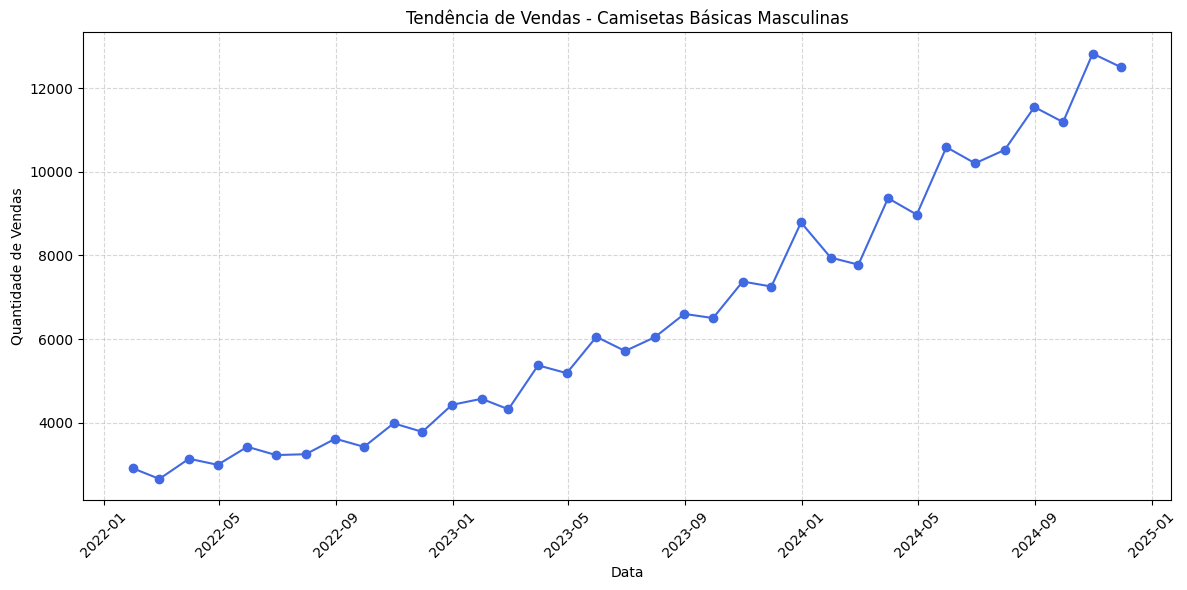

In [1]:
# Instalar bibliotecas (caso necessário)
!pip install pandas matplotlib openpyxl

# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Upload do arquivo Excel
from google.colab import files
uploaded = files.upload()

# Ler o arquivo Excel
nome_arquivo = list(uploaded.keys())[0]
df = pd.read_excel(nome_arquivo, engine='openpyxl')

# Verificar e converter colunas
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
df['Camisetas_básicas_masculinas'] = pd.to_numeric(df['Camisetas_básicas_masculinas'], errors='coerce')

# Remover linhas com dados ausentes
df = df.dropna(subset=['Timestamp', 'Camisetas_básicas_masculinas'])

# Ordenar os dados pela data
df = df.sort_values('Timestamp')

# Agrupar por mês (para suavizar a linha)
df_mensal = df.resample('Me', on='Timestamp').sum()

# Plotar o gráfico de tendência
plt.figure(figsize=(12, 6))
plt.plot(df_mensal.index, df_mensal['Camisetas_básicas_masculinas'], marker='o', linestyle='-', color='royalblue')
plt.title('Tendência de Vendas - Camisetas Básicas Masculinas')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()